In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('combined_data.csv')
print(df)

       RSSI-Value        MAC-Address            Timestamp  Distance  indoor  \
0             -19  F0:79:C0:40:FB:93  2024-09-12 09:45:00       0.0       1   
1             -18  EA:25:00:4F:3C:4D  2024-09-12 09:45:00       0.0       1   
2             -21  EF:0D:1E:F2:0C:B2  2024-09-12 09:45:01       0.0       1   
3             -19  CB:08:AA:AA:C9:C6  2024-09-12 09:45:01       0.0       1   
4             -19  ED:4F:A6:06:39:7A  2024-09-12 09:45:01       0.0       1   
...           ...                ...                  ...       ...     ...   
13348         -75  D9:7C:E2:5D:4B:A2  2024-11-30 15:56:25       2.0       0   
13349         -76  DC:FB:FD:B9:DF:CA  2024-11-30 15:56:25       2.0       0   
13350         -89  EB:A1:FF:D8:65:FE  2024-11-30 15:56:26       2.0       0   
13351         -89  E7:8C:00:9C:55:50  2024-11-30 15:56:26       2.0       0   
13352         -82  E8:9B:11:7B:D7:0F  2024-11-30 15:56:26       2.0       0   

       LOS  
0        1  
1        1  
2        1  

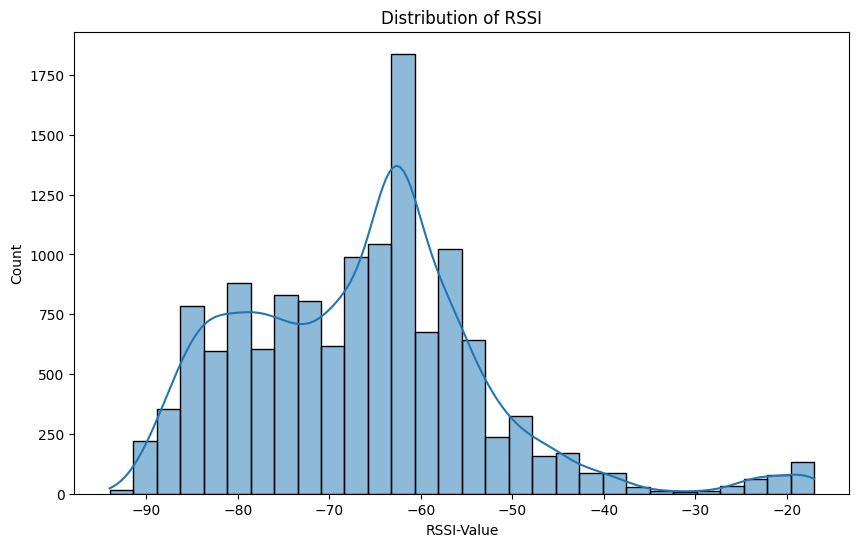

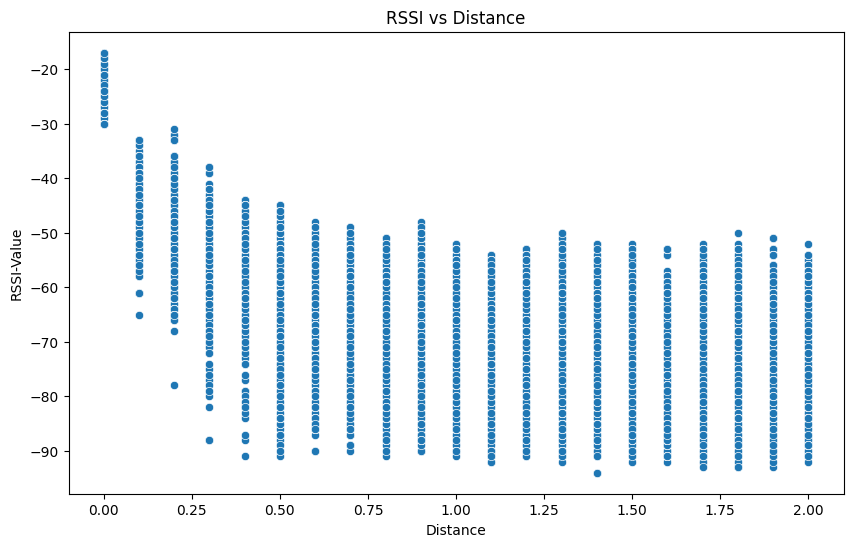

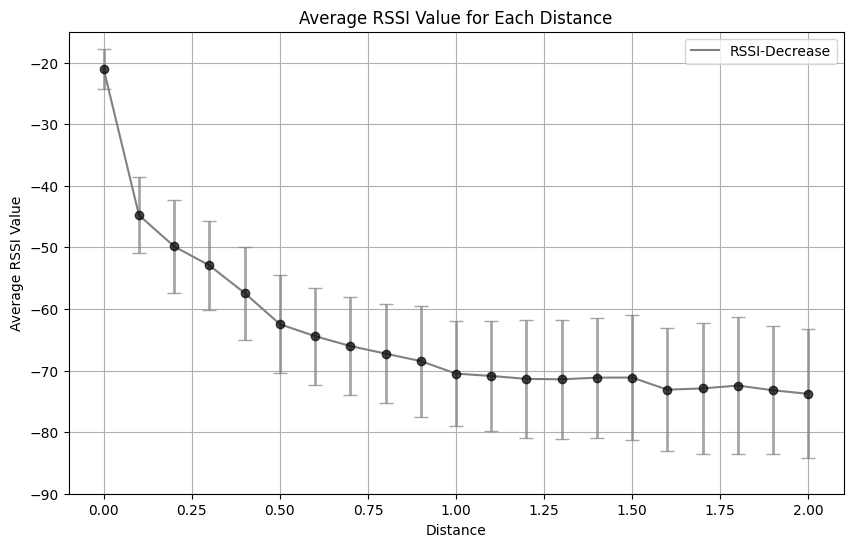

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['RSSI-Value'], bins=30, kde=True)
plt.title('Distribution of RSSI')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', y='RSSI-Value', data=df)
plt.title('RSSI vs Distance')
plt.show()

rssi_stats = df.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

plt.errorbar(
    rssi_stats['Distance'],
    rssi_stats['mean'],
    yerr=rssi_stats['std'],
    fmt='o',
    capsize=5,
    color='black',
    ecolor='gray',
    elinewidth=2,
    alpha=0.7
)

plt.plot(rssi_stats['Distance'], rssi_stats['mean'], linestyle='-', color='grey', label='RSSI-Decrease')

plt.xlabel('Distance')
plt.ylabel('Average RSSI Value')
plt.title('Average RSSI Value for Each Distance')

plt.ylim(-90, -15)

plt.grid(True)
plt.legend()

plt.show()

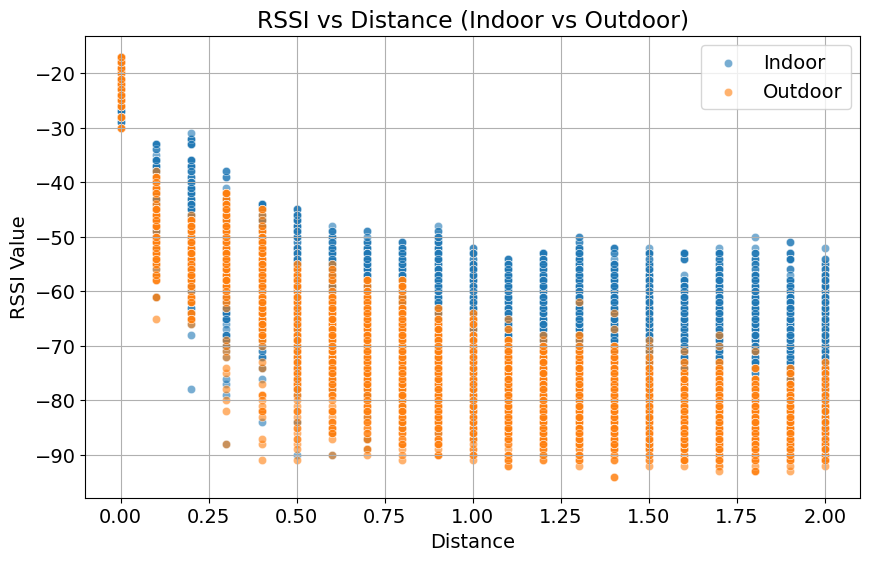

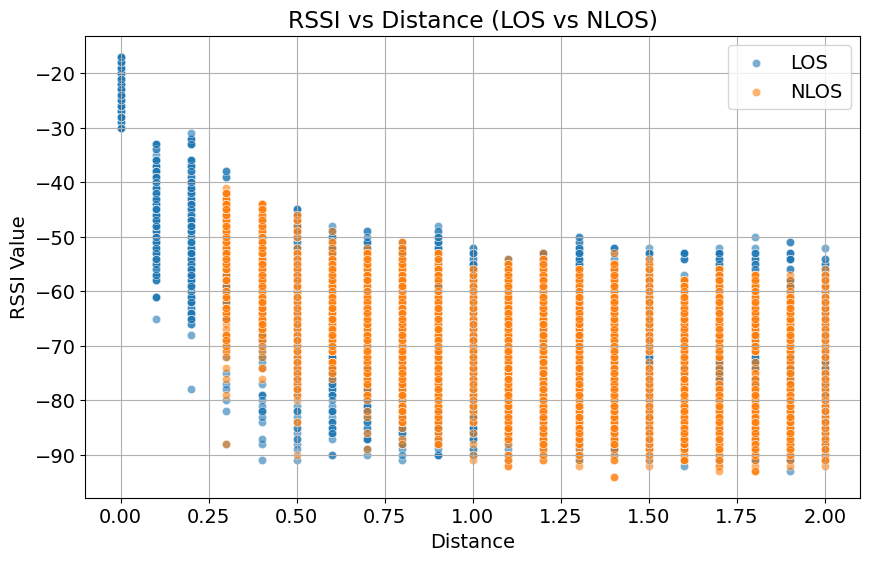

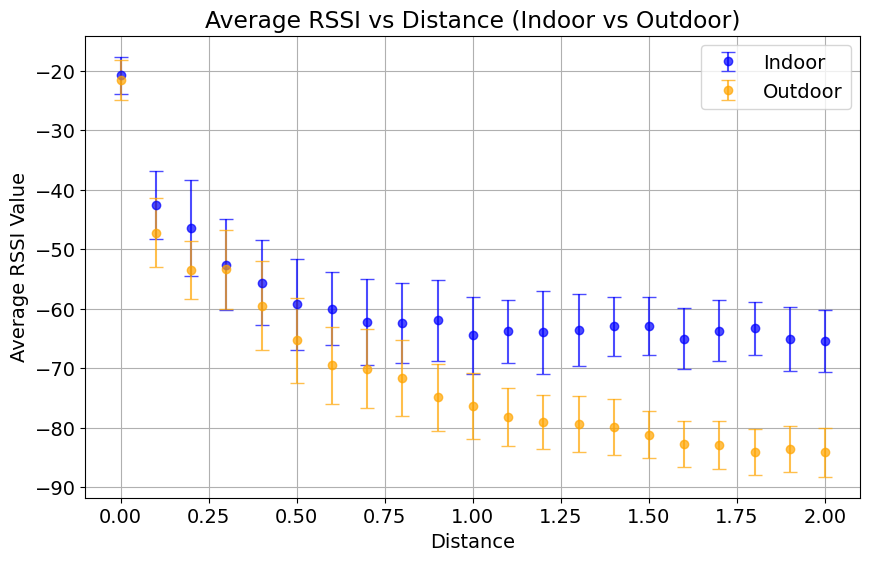

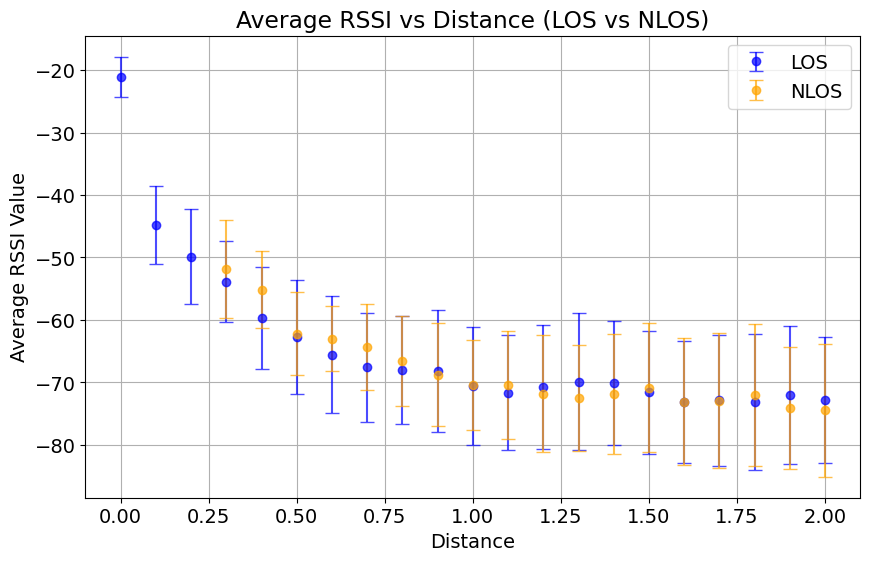

In [ ]:
plt.rcParams.update({'font.size': 14})
df_indoor = df[df['indoor'] == 1]
df_outdoor = df[df['indoor'] == 0]
df_los = df[df['LOS'] == 1]
df_nlos = df[df['LOS'] == 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='RSSI-Value', data=df_indoor, label='Indoor', alpha=0.6)
sns.scatterplot(x='Distance', y='RSSI-Value', data=df_outdoor, label='Outdoor', alpha=0.6)
plt.title('RSSI vs Distance (Indoor vs Outdoor)')
plt.xlabel('Distance')
plt.ylabel('RSSI Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='RSSI-Value', data=df_los, label='LOS', alpha=0.6)
sns.scatterplot(x='Distance', y='RSSI-Value', data=df_nlos, label='NLOS', alpha=0.6)
plt.title('RSSI vs Distance (LOS vs NLOS)')
plt.xlabel('Distance')
plt.ylabel('RSSI Value')
plt.legend()
plt.grid(True)
plt.show()

rssi_stats_indoor = df_indoor.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()
rssi_stats_outdoor = df_outdoor.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

plt.errorbar(
    rssi_stats_indoor['Distance'],
    rssi_stats_indoor['mean'],
    yerr=rssi_stats_indoor['std'],
    fmt='o', capsize=5, label='Indoor', color='blue', alpha=0.7
)

# Outdoor
plt.errorbar(
    rssi_stats_outdoor['Distance'],
    rssi_stats_outdoor['mean'],
    yerr=rssi_stats_outdoor['std'],
    fmt='o', capsize=5, label='Outdoor', color='orange', alpha=0.7
)

plt.title('Average RSSI vs Distance (Indoor vs Outdoor)')
plt.xlabel('Distance')
plt.ylabel('Average RSSI Value')
plt.legend()
plt.grid(True)
plt.show()

rssi_stats_los = df_los.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()
rssi_stats_nlos = df_nlos.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

plt.errorbar(
    rssi_stats_los['Distance'],
    rssi_stats_los['mean'],
    yerr=rssi_stats_los['std'],
    fmt='o', capsize=5, label='LOS', color='blue', alpha=0.7
)

plt.errorbar(
    rssi_stats_nlos['Distance'],
    rssi_stats_nlos['mean'],
    yerr=rssi_stats_nlos['std'],
    fmt='o', capsize=5, label='NLOS', color='orange', alpha=0.7
)

plt.title('Average RSSI vs Distance (LOS vs NLOS)')
plt.xlabel('Distance')
plt.ylabel('Average RSSI Value')
plt.legend()
plt.grid(True)
plt.show()